In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

In [14]:
import pandas as pd
import numpy as np

In [15]:
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [16]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = train.iloc[:, 1:].values / 255
y = train.iloc[:, 0].values
test = test.iloc[:, 1:].values / 255

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2020)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


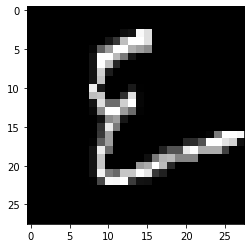

In [20]:
import matplotlib.pyplot as plt
idx = 8
plt.imshow(x_train[idx].reshape(28, 28), cmap="gray")

In [21]:
!pip install keras-rectified-adam

In [22]:
num_classes = 10
model = tf.keras.Sequential([
        tf.keras.layers.Dense(256, input_shape=(784,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64),
        tf.keras.layers.Dense(num_classes, activation="softmax"),
])

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [ ]:
from keras_radam.training import RAdamOptimizer

In [ ]:
model.compile(optimizer = RAdamOptimizer(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

In [24]:
history = model.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=[x_val, y_val])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 3s 77us/sample - loss: 1.4325 - acc: 0.5642 - val_loss: 1.1090 - val_acc: 0.8569
Epoch 2/20
33600/33600 [==============================] - 1s 21us/sample - loss: 0.2805 - acc: 0.9257 - val_loss: 0.5217 - val_acc: 0.9417
Epoch 3/20
33600/33600 [==============================] - 1s 22us/sample - loss: 0.1634 - acc: 0.9570 - val_loss: 0.2663 - val_acc: 0.9570
Epoch 4/20
33600/33600 [==============================] - 1s 23us/sample - loss: 0.1171 - acc: 0.9690 - val_loss: 0.1595 - val_acc: 0.9661
Epoch 5/20
33600/33600 [==============================] - 1s 23us/sample - loss: 0.0909 - acc: 0.9760 - val_loss: 0.1153 - val_acc: 0.9721
Epoch 6/20
33600/33600 [==============================] - 1s 24us/sample - loss: 0.0727 - acc: 0.9816 - val_loss: 0.0927 - val_acc: 0.9744
Epoch 7/20
33600/33600 

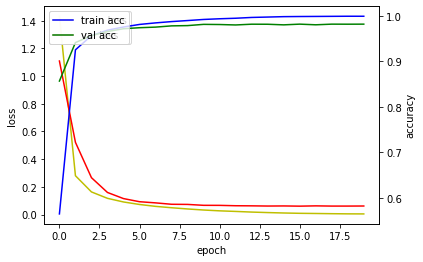

In [25]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
prediction = model.predict_classes(test)

In [29]:
prediction[:7]

array([8, 0, 5, 3, 8, 1, 9])

In [30]:
sample_submission.head()

,Id,Category
0,57808,0
1,4960,0
2,35755,0
3,15543,0
4,48968,0


In [31]:
sample_submission["Category"] = pd.Series(prediction)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [ ]:
sample_submission.to_csv("keras_sub.csv", index=False)